# Project 3: Web API & Classification

## Problem Statement

Given posts using Reddits API, i will collect posts from 2 subreddits:

- Computing
- Data Science

I will use NLP to train a classifier on which subreddit a post came from.

## Executive Summary

I have tried two different models based on the posts i have collected:

- Naive Bayes
- Logistic Regression

Naive Bayes classifier was found to be more accurate at classifying titles into subreddits than the comparison model.

### Contents:
- [Scraping Reddit for Data](#Scraping-reddit-for-data)
- [Data Cleaning](#Data-Cleaning)
- [Combining Data](#Combining-Data)
- [Combine our Cleaning into One Function](#Combine-our-Cleaning-into-One-Function)
- [EDA](#EDA)
- [Create Feature Matrix and Target](#Create-Feature-Matrix-and-Target)
- [Naive Bayes classifier](#Naive-Bayes-classifier)
- [Logistic Regression classifier](#Logistic-Regression-classifier)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

In [70]:
# Standard import
import requests
import pandas as pd
import numpy as np
import scipy.stats as stats
import time
import random

# visual
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
%matplotlib inline

# Import stopwords.
from nltk.corpus import stopwords
import regex as re
from bs4 import BeautifulSoup
from nltk.stem.porter import PorterStemmer

# Import classifier and other related libraries.
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression, LinearRegression

## Combining Data

Reading in data from the files.

In [68]:
df1 = pd.read_csv('../data/computing.csv')
df1

,Unnamed: 0,subreddit,title,selftext
0,0,computing,PC Not Turning On,My PC started acting weird about a week ago. I...
1,2,computing,"Hey, can you help me answer this ?",If AX contain 1000101000110001 then what is th...
2,3,computing,Secure Data Collaboration: Exclusive Sneak-Peak!,Who’s not getting flooded with ‘personalized’ ...
3,4,computing,Choosing a Monitor,"I currently have two 21.5"" monitors side by si..."
4,5,computing,Need help to commando to CMD,"Hello, I need help on some CMD commands. I am ..."
...,...,...,...,...
510,669,computing,Predecessor of the Intel Boot Guard?,"To start off, I am not even sure if this is th..."
511,670,computing,Help me with g-sync and null,Tell me if I am wrong. But I think I figured i...
512,671,computing,Password Protecting External ExFat Hard Disk D...,Please suggest a utility software to password ...
513,672,computing,which SSD can I install to my Dell Inspiron 7559?,Hello\n\nI am looking to upgrade to 1TB SSD bu...


In [3]:
df2 = pd.read_csv('../data/datascience.csv')
df2

,Unnamed: 0,subreddit,title,selftext
0,0,datascience,Weekly Entering &amp; Transitioning Thread | 2...,Welcome to this week's entering &amp; transiti...
1,2,datascience,Data Science is not an easy and quick job that...,My company hired a three man team of data scie...
2,3,datascience,Summer programs for undergrads?,I'm a sophomore in college considering a caree...
3,4,datascience,Undergraduate Data Science internships,Hi everyone! I'm an undergraduate junior Appli...
4,5,datascience,Is working as an analyst or DS in sustainabili...,\nI’m having major doubts about my career and ...
...,...,...,...,...
506,568,datascience,Question on a possible project,"Hi, I would like to start a project for my MSc..."
507,569,datascience,Thoughts on The Social Dilemma?,There's a recently released Netflix documentar...
508,570,datascience,Percentage of non traditional path Data Scient...,What is rough percentage of data scientist in ...
509,573,datascience,On a team with no technical expertise--need ad...,"So for context, I'm currently a Business Analy..."


Dropping `Unnamed: 0` columns.

In [4]:
df1.drop(columns = 'Unnamed: 0', inplace = True)
df1

,subreddit,title,selftext
0,computing,PC Not Turning On,My PC started acting weird about a week ago. I...
1,computing,"Hey, can you help me answer this ?",If AX contain 1000101000110001 then what is th...
2,computing,Secure Data Collaboration: Exclusive Sneak-Peak!,Who’s not getting flooded with ‘personalized’ ...
3,computing,Choosing a Monitor,"I currently have two 21.5"" monitors side by si..."
4,computing,Need help to commando to CMD,"Hello, I need help on some CMD commands. I am ..."
...,...,...,...
510,computing,Predecessor of the Intel Boot Guard?,"To start off, I am not even sure if this is th..."
511,computing,Help me with g-sync and null,Tell me if I am wrong. But I think I figured i...
512,computing,Password Protecting External ExFat Hard Disk D...,Please suggest a utility software to password ...
513,computing,which SSD can I install to my Dell Inspiron 7559?,Hello\n\nI am looking to upgrade to 1TB SSD bu...


In [5]:
df2.drop(columns = 'Unnamed: 0', inplace = True)
df2

,subreddit,title,selftext
0,datascience,Weekly Entering &amp; Transitioning Thread | 2...,Welcome to this week's entering &amp; transiti...
1,datascience,Data Science is not an easy and quick job that...,My company hired a three man team of data scie...
2,datascience,Summer programs for undergrads?,I'm a sophomore in college considering a caree...
3,datascience,Undergraduate Data Science internships,Hi everyone! I'm an undergraduate junior Appli...
4,datascience,Is working as an analyst or DS in sustainabili...,\nI’m having major doubts about my career and ...
...,...,...,...
506,datascience,Question on a possible project,"Hi, I would like to start a project for my MSc..."
507,datascience,Thoughts on The Social Dilemma?,There's a recently released Netflix documentar...
508,datascience,Percentage of non traditional path Data Scient...,What is rough percentage of data scientist in ...
509,datascience,On a team with no technical expertise--need ad...,"So for context, I'm currently a Business Analy..."


Merging the 2 datas together.

In [6]:
df = pd.concat([df1, df2], join='inner', ignore_index=True)

In [7]:
df

,subreddit,title,selftext
0,computing,PC Not Turning On,My PC started acting weird about a week ago. I...
1,computing,"Hey, can you help me answer this ?",If AX contain 1000101000110001 then what is th...
2,computing,Secure Data Collaboration: Exclusive Sneak-Peak!,Who’s not getting flooded with ‘personalized’ ...
3,computing,Choosing a Monitor,"I currently have two 21.5"" monitors side by si..."
4,computing,Need help to commando to CMD,"Hello, I need help on some CMD commands. I am ..."
...,...,...,...
1021,datascience,Question on a possible project,"Hi, I would like to start a project for my MSc..."
1022,datascience,Thoughts on The Social Dilemma?,There's a recently released Netflix documentar...
1023,datascience,Percentage of non traditional path Data Scient...,What is rough percentage of data scientist in ...
1024,datascience,On a team with no technical expertise--need ad...,"So for context, I'm currently a Business Analy..."


Changing the subreddit into numbers.

In [8]:
df['subreddit'] = [1 if i == 'datascience' else 0 for i in df['subreddit']]

In [9]:
df

,subreddit,title,selftext
0,0,PC Not Turning On,My PC started acting weird about a week ago. I...
1,0,"Hey, can you help me answer this ?",If AX contain 1000101000110001 then what is th...
2,0,Secure Data Collaboration: Exclusive Sneak-Peak!,Who’s not getting flooded with ‘personalized’ ...
3,0,Choosing a Monitor,"I currently have two 21.5"" monitors side by si..."
4,0,Need help to commando to CMD,"Hello, I need help on some CMD commands. I am ..."
...,...,...,...
1021,1,Question on a possible project,"Hi, I would like to start a project for my MSc..."
1022,1,Thoughts on The Social Dilemma?,There's a recently released Netflix documentar...
1023,1,Percentage of non traditional path Data Scient...,What is rough percentage of data scientist in ...
1024,1,On a team with no technical expertise--need ad...,"So for context, I'm currently a Business Analy..."


## Combine our Cleaning into One Function

- Step 1: Remove HTML
- Step 2: Remove non-letters
- Step 3: Convert words to lower cases
- Step 4: List stopwords
- Step 5: Remove stopwords

In [12]:
def review_to_words(raw_review):
    # Function to convert a raw review to a string of words
    # The input is a single string (a raw movie review), and 
    # the output is a single string (a preprocessed movie review)
    
    # 1. Remove HTML.
    review_text = BeautifulSoup(raw_review).get_text()
    
    # 2. Remove non-letters.
    letters_only = re.sub("[^a-zA-Z]", " ", review_text)
    
    # 3. Convert to lower case, split into individual words.
    words = letters_only.lower().split()
    
    # 4. In Python, searching a set is much faster than searching
    # a list, so convert the stopwords to a set.
    stops = set(stopwords.words('english') + ['computing' , 'datascience' , 'data' , 'science'])
    
    # 5. Remove stopwords.
    meaningful_words = [w for w in words if w not in stops]
            
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    return(" ".join(meaningful_words))

### 1. Clean our Title Column

In [13]:
df['title'] = df['title'].map(review_to_words)

In [14]:
df

,subreddit,title,selftext
0,0,pc turning,My PC started acting weird about a week ago. I...
1,0,hey help answer,If AX contain 1000101000110001 then what is th...
2,0,secure collaboration exclusive sneak peak,Who’s not getting flooded with ‘personalized’ ...
3,0,choosing monitor,"I currently have two 21.5"" monitors side by si..."
4,0,need help commando cmd,"Hello, I need help on some CMD commands. I am ..."
...,...,...,...
1021,1,question possible project,"Hi, I would like to start a project for my MSc..."
1022,1,thoughts social dilemma,There's a recently released Netflix documentar...
1023,1,percentage non traditional path scientists team,What is rough percentage of data scientist in ...
1024,1,team technical expertise need advice getting p...,"So for context, I'm currently a Business Analy..."


### 2. Clean our Selftext Column

In [15]:
df['selftext'] = df['selftext'].map(review_to_words)

/opt/anaconda3/lib/python3.8/site-packages/bs4/__init__.py:329: MarkupResemblesLocatorWarning: "." looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [16]:
df

,subreddit,title,selftext
0,0,pc turning,pc started acting weird week ago would switch ...
1,0,hey help answer,ax contain value fount ah shift right two time...
2,0,secure collaboration exclusive sneak peak,getting flooded personalized ads amid continuo...
3,0,choosing monitor,currently two monitors side side setup find ne...
4,0,need help commando cmd,hello need help cmd commands starting use cmd ...
...,...,...,...
1021,1,question possible project,hi would like start project msc cognitive neur...
1022,1,thoughts social dilemma,recently released netflix documentary called s...
1023,1,percentage non traditional path scientists team,rough percentage scientist team math physics c...
1024,1,team technical expertise need advice getting p...,context currently business analyst within corp...


Merge the `title` & `selftext` columns together into a `New` column.

In [17]:
df['New'] = df['title'] + df['selftext']

In [18]:
df

,subreddit,title,selftext,New
0,0,pc turning,pc started acting weird week ago would switch ...,pc turningpc started acting weird week ago wou...
1,0,hey help answer,ax contain value fount ah shift right two time...,hey help answerax contain value fount ah shift...
2,0,secure collaboration exclusive sneak peak,getting flooded personalized ads amid continuo...,secure collaboration exclusive sneak peakgetti...
3,0,choosing monitor,currently two monitors side side setup find ne...,choosing monitorcurrently two monitors side si...
4,0,need help commando cmd,hello need help cmd commands starting use cmd ...,need help commando cmdhello need help cmd comm...
...,...,...,...,...
1021,1,question possible project,hi would like start project msc cognitive neur...,question possible projecthi would like start p...
1022,1,thoughts social dilemma,recently released netflix documentary called s...,thoughts social dilemmarecently released netfl...
1023,1,percentage non traditional path scientists team,rough percentage scientist team math physics c...,percentage non traditional path scientists tea...
1024,1,team technical expertise need advice getting p...,context currently business analyst within corp...,team technical expertise need advice getting p...


## EDA

In [22]:
# Print top words in df1

cvec = CountVectorizer(stop_words='english')
cvec.fit(df1['title'])

len_features = len(cvec.get_feature_names())
print(len_features)

df1_cv = pd.DataFrame(cvec.transform(df1['title']).todense(),columns=cvec.get_feature_names())

top_a = df1_cv.sum(axis=0)
top_a.sort_values(ascending = False).head(20)

1274


help         63
pc           49
laptop       38
computing    31
need         29
computer     25
windows      24
question     23
monitor      19
best         17
drive        15
vs           15
hard         14
ssd          14
new          14
10           13
use          13
cpu          13
usb          12
advice       12
dtype: int64

In [23]:
# Print top words in df2

cvec = CountVectorizer(stop_words='english')
cvec.fit(df2['title'])

len_features = len(cvec.get_feature_names())
print(len_features)

df2_cv = pd.DataFrame(cvec.transform(df2['title']).todense(),columns=cvec.get_feature_names())

top_b = df2_cv.sum(axis=0)
top_b.sort_values(ascending = False).head(20)

1325


data         228
science       96
scientist     35
vs            22
advice        20
ds            20
work          20
learning      19
time          18
job           18
does          17
ml            17
model         16
analyst       16
best          16
help          16
good          15
like          15
career        15
python        15
dtype: int64

In [24]:
# Get top words in df1

df_top_a = top_a.to_frame(name='count')
df_top_a['word'] = df_top_a.index
df_top_a.reset_index(drop=True, inplace=True)
df_top_a['freq'] = df_top_a['count'] / len(df1) * 100

cols = ['word','count','freq']
df_top_a = df_top_a[cols]
df_top_a.sort_values(by='count',ascending=False, inplace=True)
df_top_a.head(10)

,word,count,freq
552,help,63,12.233010
827,pc,49,9.514563
653,laptop,38,7.378641
268,computing,31,6.019417
768,need,29,5.631068
266,computer,25,4.854369
1237,windows,24,4.660194
908,question,23,4.466019
750,monitor,19,3.689320
150,best,17,3.300971


In [25]:
# Get top words in df2

df_top_b = top_b.to_frame(name='count')
df_top_b['word'] = df_top_b.index
df_top_b.reset_index(drop=True, inplace=True)
df_top_b['freq'] = df_top_b['count'] / len(df2) * 100

cols = ['word','count','freq']
df_top_b = df_top_b[cols]
df_top_b.sort_values(by='count',ascending=False, inplace=True)
df_top_b.head(10)

,word,count,freq
280,data,228,44.618395
1027,science,96,18.786693
1028,scientist,35,6.849315
1282,vs,22,4.305284
1306,work,20,3.913894
32,advice,20,3.913894
354,ds,20,3.913894
646,learning,19,3.718200
1191,time,18,3.522505
611,job,18,3.522505


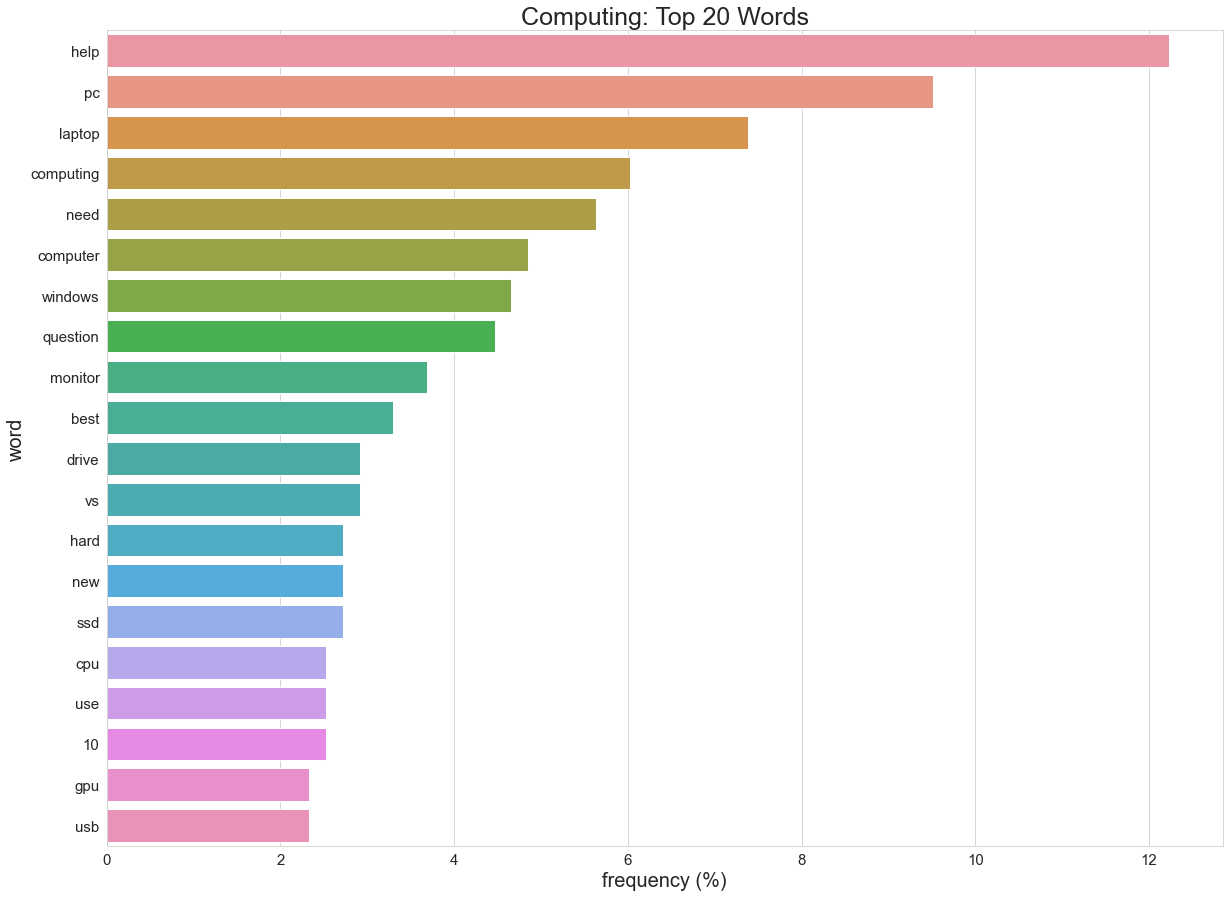

In [78]:
# Illustrating the most common words in Computing Subreddit
plt.figure(figsize=(20,15))
plt.title('Computing: Top 20 Words',fontsize=25)

sns.set_style("whitegrid")
sns.barplot(data=df_top_a.head(20),x='freq',y='word',orient='h')

plt.xlabel('frequency (%)',fontsize=20)
plt.ylabel('word',fontsize=20)
plt.tick_params(labelsize=15)

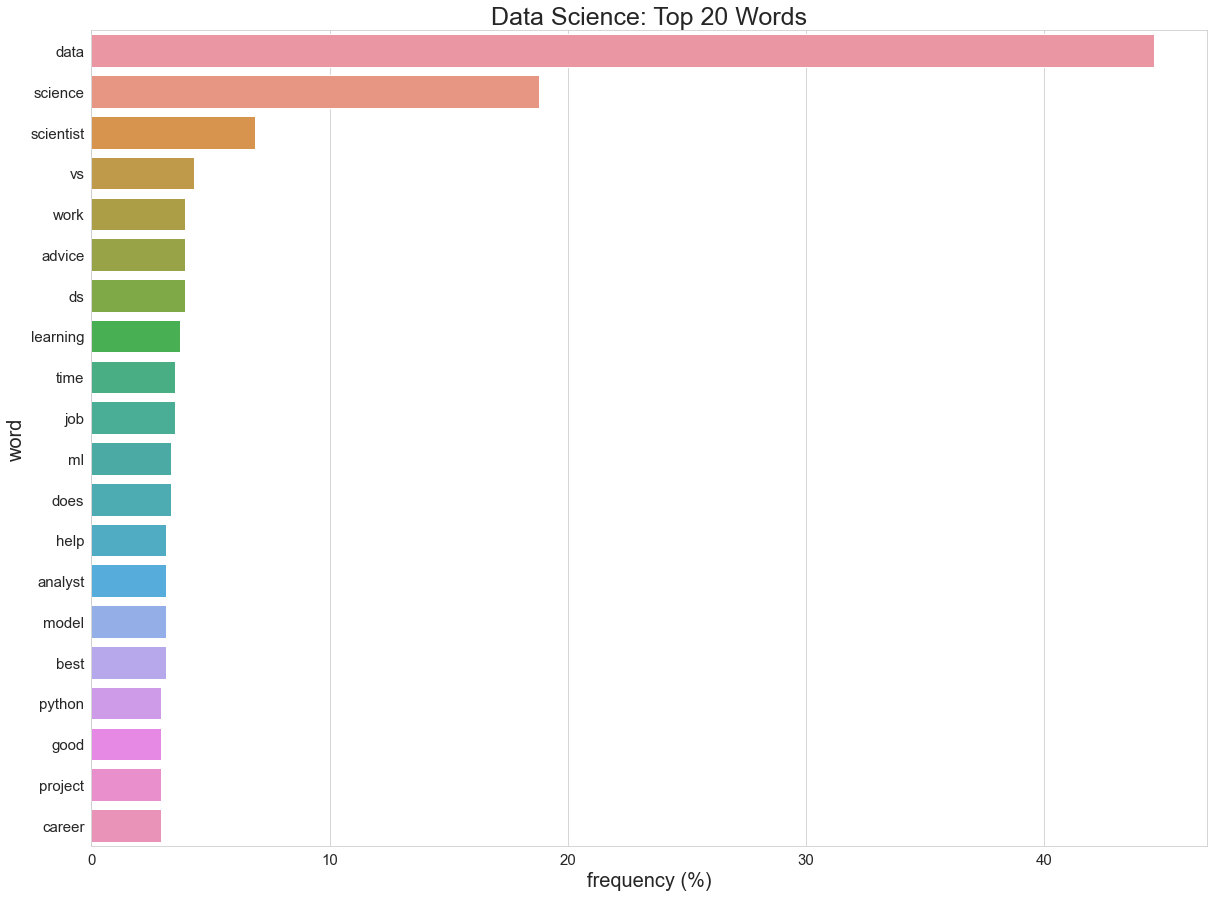

In [79]:
# Illustrating the most common words in Data Science Subreddit
plt.figure(figsize=(20,15))
plt.title('Data Science: Top 20 Words',fontsize=25)

sns.set_style("whitegrid")
sns.barplot(data=df_top_b.head(20),x='freq',y='word',orient='h')

plt.xlabel('frequency (%)',fontsize=20)
plt.ylabel('word',fontsize=20)
plt.tick_params(labelsize=15)

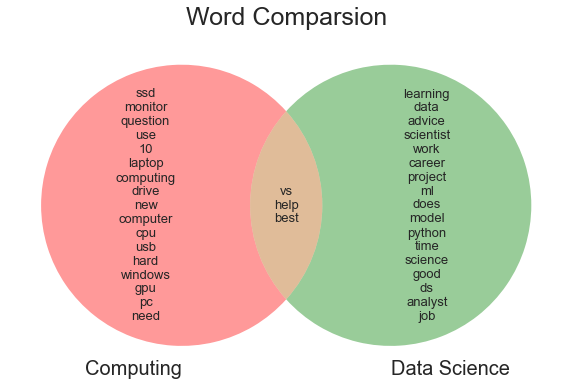

In [77]:
plt.figure(figsize=(10,10))
plt.title('Word Comparsion',fontsize=25)

set_a = set(df_top_a['word'][:20])
set_b = set(df_top_b['word'][:20])

venn = venn2([set_a,set_b],set_labels=['Computing','Data Science'])

venn.get_label_by_id('100').set_text('\n'.join(map(str,set_a-set_b)))
venn.get_label_by_id('110').set_text('\n'.join(map(str,set_a&set_b)))
venn.get_label_by_id('010').set_text('\n'.join(map(str,set_b-set_a)))

venn.get_label_by_id('A').set_size(20)
venn.get_label_by_id('B').set_size(20)
venn.get_label_by_id('100').set_size(13)
venn.get_label_by_id('110').set_size(13)
venn.get_label_by_id('010').set_size(13)

### Interpretation

The top 20 words for Computing and Data Science are identified. Among these, there are 3 common words that are used for both topic.

Since these 2 topics do not share much common words, it is expected that the system is able to classify which subreddit does a new post belong to.

## Create Feature Matrix and Target

In [28]:
X = df['New']
y = df['subreddit']

In [29]:
# Create train_test_split.
X_train, X_test, y_train, y_test = train_test_split(X , y ,
                                                    test_size = 0.25,
                                                    random_state = 42)

In [30]:
# Import CountVectorizer.
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate the "CountVectorizer" object, which is sklearn's
# bag of words tool.
vectorizer = CountVectorizer() 

In [31]:
# fit_transform() does two things: First, it fits the model and 
# learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a 
# list of strings.

X_train_vec = vectorizer.fit_transform(X_train)

X_test_vec = vectorizer.transform(X_test)


In [32]:
X_train_vec.shape

(769, 8844)

In [33]:
X_test_vec.shape

(257, 8844)

## Naive Bayes classifier

In [43]:
# Step 1: Instantiate our model
nb = MultinomialNB()

# Step 2: Fit our model
model = nb.fit(X_train_vec, y_train)

# Step 3: Generate our predictions
prediction1 = model.predict(X_test_vec)

In [44]:
# Score our model on the training set.
train1 = model.score(X_train_vec, y_train)

# Score our model on the testing set.
test1 = model.score(X_test_vec, y_test)

# Generate a confusion matrix.
cm = confusion_matrix(y_test, prediction1)
cm_df = pd.DataFrame(cm, columns=['pred positive', 'pred negative'], index=['true positive', 'true negative'])

tn1, fp1, fn1, tp1 = confusion_matrix(y_test, prediction1).ravel()

accuracy1 = (tp1 + tn1)/(tp1 + fp1 + fn1 + tn1)
sensitivity1 = tp1/(tp1 + fn1)
specificity1 = tn1/(tn1 + fp1)
precision1 = tp1/(tp1 + fp1)

In [45]:
print('Our training score is: ', round(train1 , 3))
print('Our testing score is: ', round(test1 , 3))

print('\n')
print('Our confusion matrix is:')
cm_df

Our training score is:  0.979
Our testing score is:  0.914


Our confusion matrix is:


,pred positive,pred negative
true positive,108,19
true negative,3,127


In [46]:
print("True Negatives: %s" % tn1)
print("False Positives: %s" % fp1)
print("False Negatives: %s" % fn1)
print("True Positives: %s" % tp1)

print('\n')
print('Accuracy is:' , round(accuracy1 , 3))
print('Sensitivity is:' , round(sensitivity1 , 3))
print('Specificity is:' , round(specificity1 , 3))
print('Precision is:' , round(precision1 , 3))

True Negatives: 108
False Positives: 19
False Negatives: 3
True Positives: 127


Accuracy is: 0.914
Sensitivity is: 0.977
Specificity is: 0.85
Precision is: 0.87


### Conclusion

For our Naive Bayes classifier, it shows sign of overfitting (the training score of 0.979 is higher than the testing score of 0.914). 

Beside that, it is considered a good classifier for our subreddit prediction. We will examine other test model to compare the results.

## Logistic Regression classifier

In [59]:
# Import logistic & linear regression
from sklearn.linear_model import LogisticRegression, LinearRegression

In [60]:
# Step 1: Instantiate our model.
logreg = LogisticRegression()

# Step 2: Fit our model.
logreg.fit(X_train_vec, y_train)

# Step 3: Generate our predictions.
pred = logreg.predict(X_test_vec)

In [61]:
# Score our model on the training data
train2 = logreg.score(X_train_vec, y_train)

# Score our model on the testing data
test2 = logreg.score(X_test_vec, y_test)

# Generate a confusion matrix
cm = confusion_matrix(y_test, pred)
cm_df = pd.DataFrame(cm, columns=['pred positive', 'pred negative'], index=['true positive', 'true negative'])

tn2, fp2, fn2, tp2 = confusion_matrix(y_test, pred).ravel()

accuracy2 = (tp2 + tn2)/(tp2 + fp2 + fn2 + tn2)
sensitivity2 = tp2/(tp2 + fn2)
specificity2 = tn2/(tn2 + fp2)
precision2 = tp2/(tp2 + fp2)

In [63]:
print('Our training score is: ', round(train2 , 3))
print('Our testing score is: ', round(test2 , 3))

print('\n')
print('Our confusion matrix is:')
cm_df

Our training score is:  1.0
Our testing score is:  0.872


Our confusion matrix is:


,pred positive,pred negative
true positive,114,13
true negative,20,110


In [64]:
print("True Negatives: %s" % tn2)
print("False Positives: %s" % fp2)
print("False Negatives: %s" % fn2)
print("True Positives: %s" % tp2)

print('\n')
print('Accuracy is:' , round(accuracy2 , 3))
print('Sensitivity is:' , round(sensitivity2 , 3))
print('Specificity is:' , round(specificity2 , 3))
print('Precision is:' , round(precision2 , 3))

True Negatives: 114
False Positives: 13
False Negatives: 20
True Positives: 110


Accuracy is: 0.872
Sensitivity is: 0.846
Specificity is: 0.898
Precision is: 0.894


### Conclusion

For our Logistic Regression classifier, it shows sign of overfitting, the result is worse than our Naive Bayes classifier (the training score of 1 is much higher than the testing score of 0.872).

It shows that the prediction result is even worse than our Naive Bayes classifier.

## Conclusion and Recommendation

For this study, we have tried 2 different classifiers based on the subreddits:

- `Naive Bayes`
- `Logistic Regression`

By comparing the results of these 2 classifiers, we found that the `Naive Bayes` classifier is able to predict better on unseen data. With a testing score of `91.4%`, it can give a good prediction on which subreddit does a new post comes from.